## I add an initial summary of what I did initially, it's not part of the report, it's just a note
# CV Project 2023
###### by Emanuele Corongiu


This project involves the implementation of software, through the YOLO neural network model, for automatic recognition of car license plates. In the first step we tried to carry out the detection and then introduced the tracking of them. In the next steps I would like to try to introduce license plate number extraction. 

### Training

The first phase was training. This was performed by searching an online dataset that included tot images for training tot for validation and tot for testing. In the early stages, the code was implemented through the google Colab platform and the excerpt can be seen below.

In [ ]:
#Loading Google Drive

from google.colab import drive
import os
drive.mount('/content/drive')

ROOT_DIR = '/content/drive/My Drive/Data'

#Loading model YOLO V8
!pip install ultralytics --upgrade 
import ultralytics

Once google drive is loaded and the library is imported, one can proceed with training the network. It was chosen to train the network with 100 epochs, in particular acceptable performance was found with a number of epochs from 50 and up. But from this point of view it must be remembered that the starting dataset had a few hundred images.

In [ ]:
#REFERENCE: https://docs.ultralytics.com/modes/train/#usage-examples
import os
from ultralytics import YOLO #library that contains the model

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch, here we can choose the pattern, size etc. of our pattern we want to use.

# Use the model
result = model.train(data=os.path.join(ROOT_DIR, 'data.yaml'), epochs=100)  # train the model, 

Once the model is trained you can use it with individual images in the following way:

In [ ]:
#REFERENCE: https://docs.ultralytics.com/modes/predict/#inference-sources
model = YOLO("/content/drive/MyDrive/Modello/detect/train3/weights/best.pt")
model.predict(source="/content/drive/MyDrive/Data/demo.mp4",
   save=True,
   conf=0.25,
   #show=True # Display preds. Accepts all YOLO predict arguments
)
#it is possibile to save also the cropped license with save_crop=True
#for CLI !yolo task=detect mode=predict model="/content/drive/MyDrive/Modello/detect/train3/weights/best.pt" save=True source="/content/drive/MyDrive/Data/demo.mp4"

Yolo incorporates a tracker within it, so it can easily be used, even to perform tracking on video as in the example below. 

In [ ]:
#REFERENCE: https://docs.ultralytics.com/modes/track/#available-trackers

model = YOLO('/content/drive/MyDrive/Modello/detect/train3/weights/best.pt')
results = model.track(source="/content/drive/MyDrive/Data/demo.mp4",
   save=True,
   conf=0.25,
   #show=True # Display preds. Accepts all YOLO predict arguments
)

#results.save("/content/drive/MyDrive/runs") this doesnt work
#it is possibile to save also the cropped license with save_crop=True o somthing like this
!mv runs /content/drive/MyDrive/Results

Applying the previous tracking does not allow us to see how the operation proceeds frame by frame, but directly gives a final result. With a few tricks, it can also be implemented in a different way and possibly add additional elements in the frames to better analyze the movements of the license plates.


0: 416x640 1 carPlate, 23.7ms
Speed: 3.0ms preprocess, 23.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


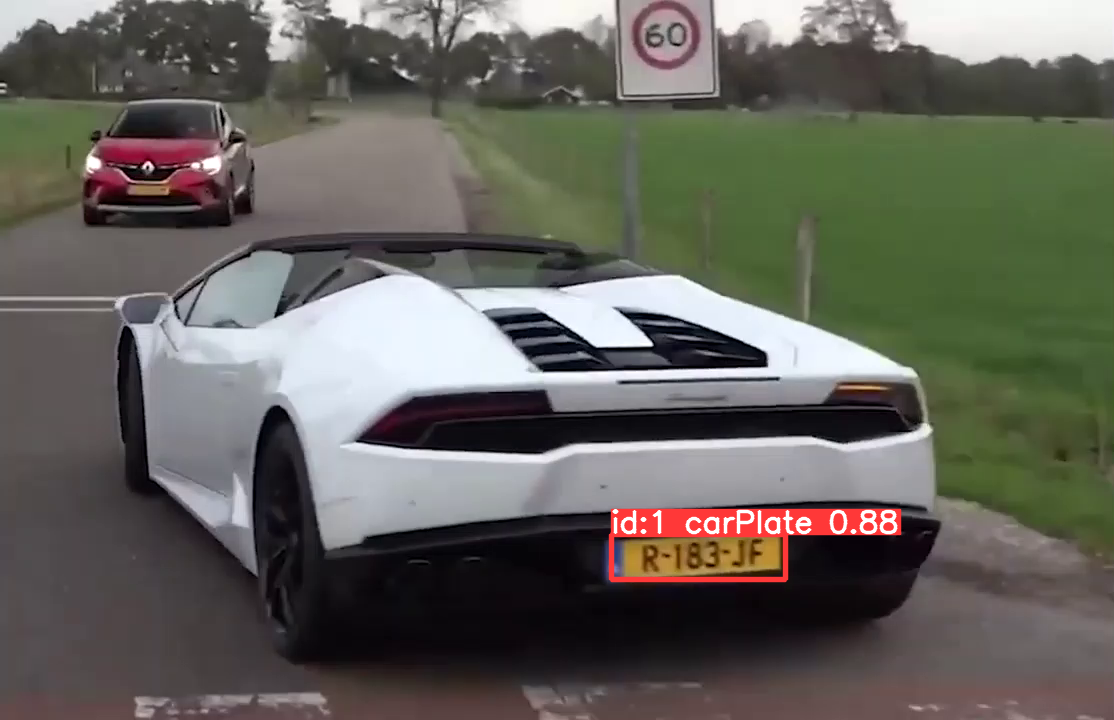


0: 416x640 1 carPlate, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


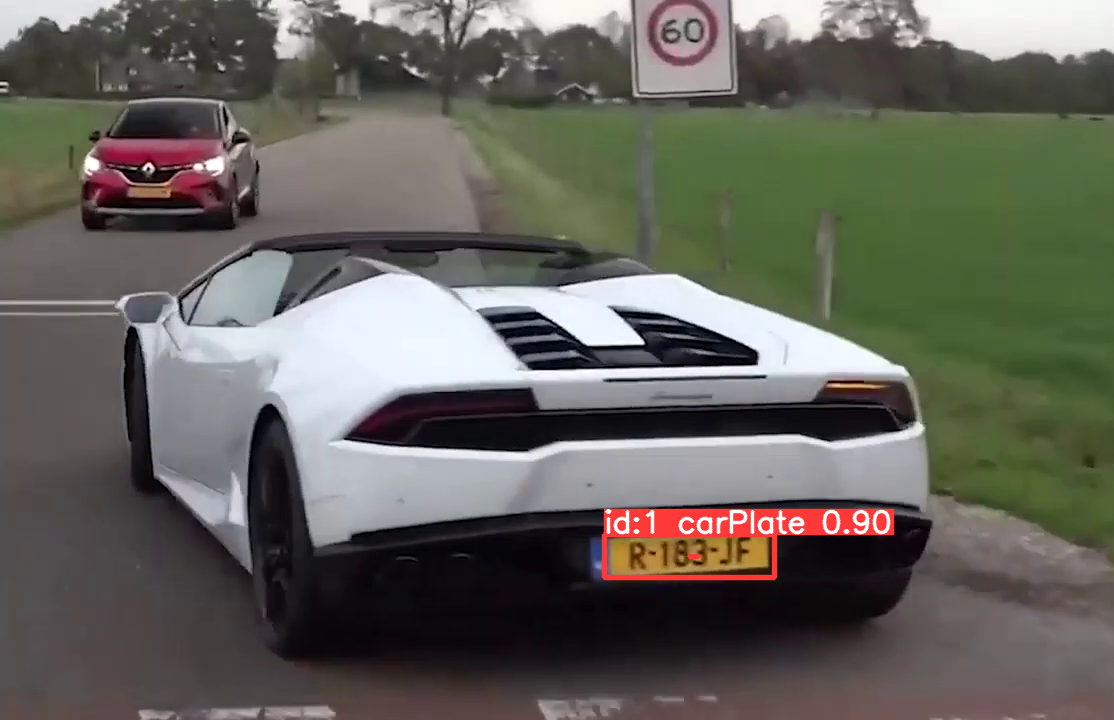


0: 416x640 1 carPlate, 11.1ms
Speed: 3.0ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


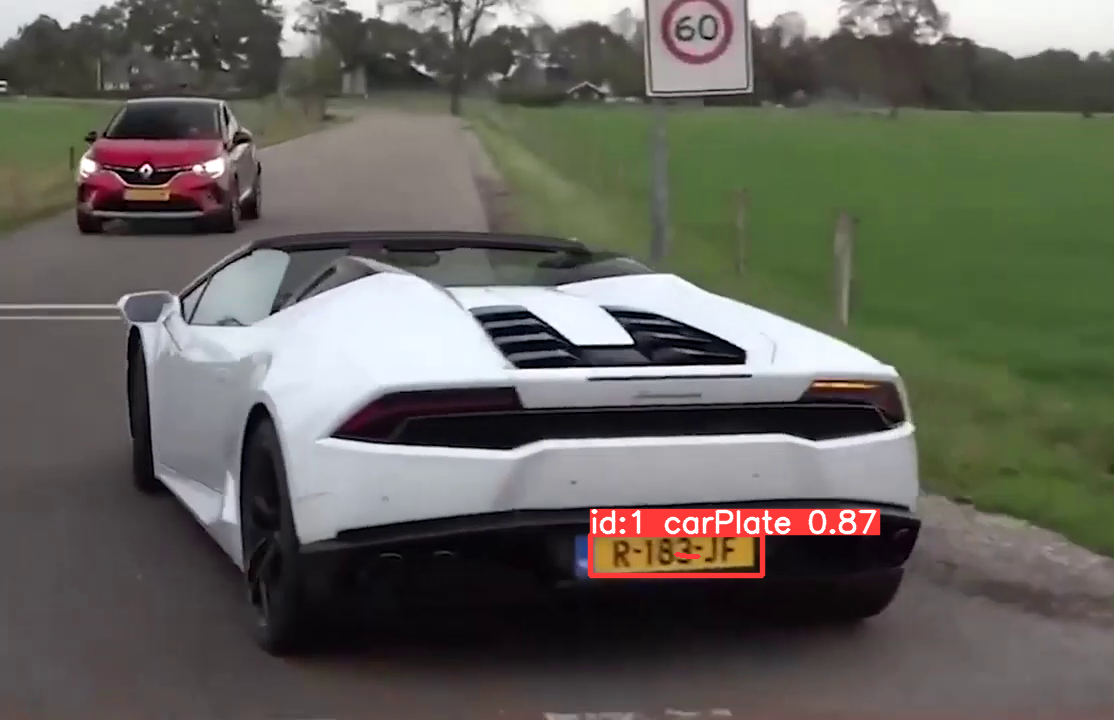


0: 416x640 1 carPlate, 55.5ms
Speed: 14.2ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


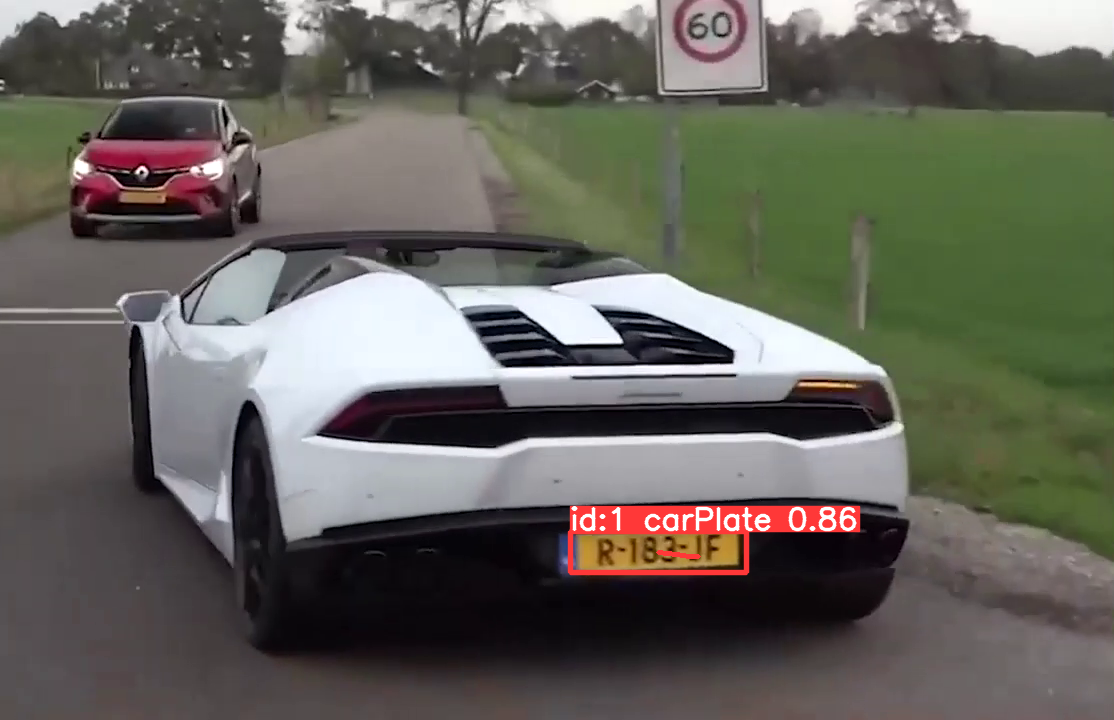


0: 416x640 1 carPlate, 15.3ms
Speed: 9.8ms preprocess, 15.3ms inference, 11.8ms postprocess per image at shape (1, 3, 416, 640)


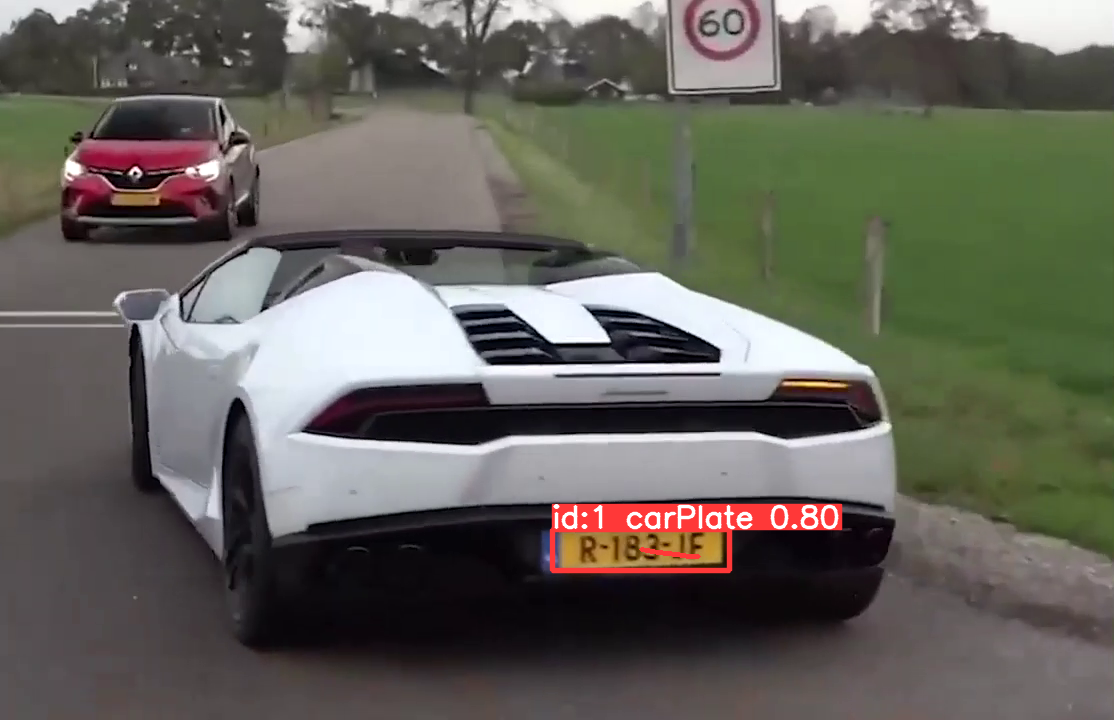


0: 416x640 1 carPlate, 19.1ms
Speed: 9.1ms preprocess, 19.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 640)


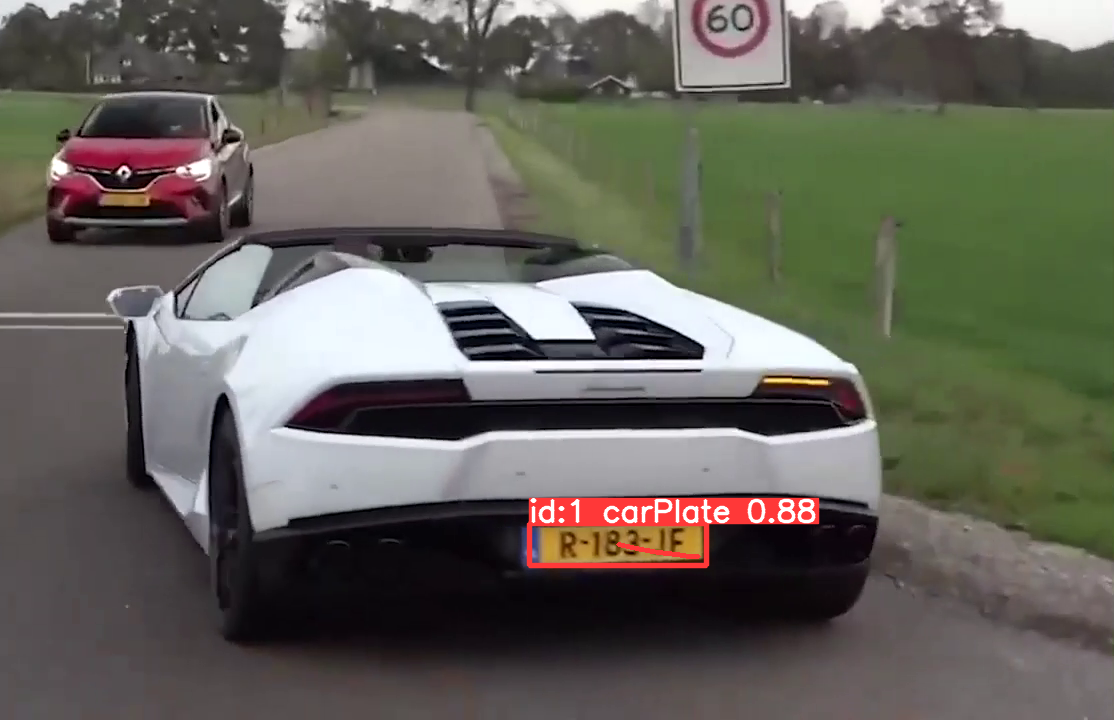


0: 416x640 1 carPlate, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


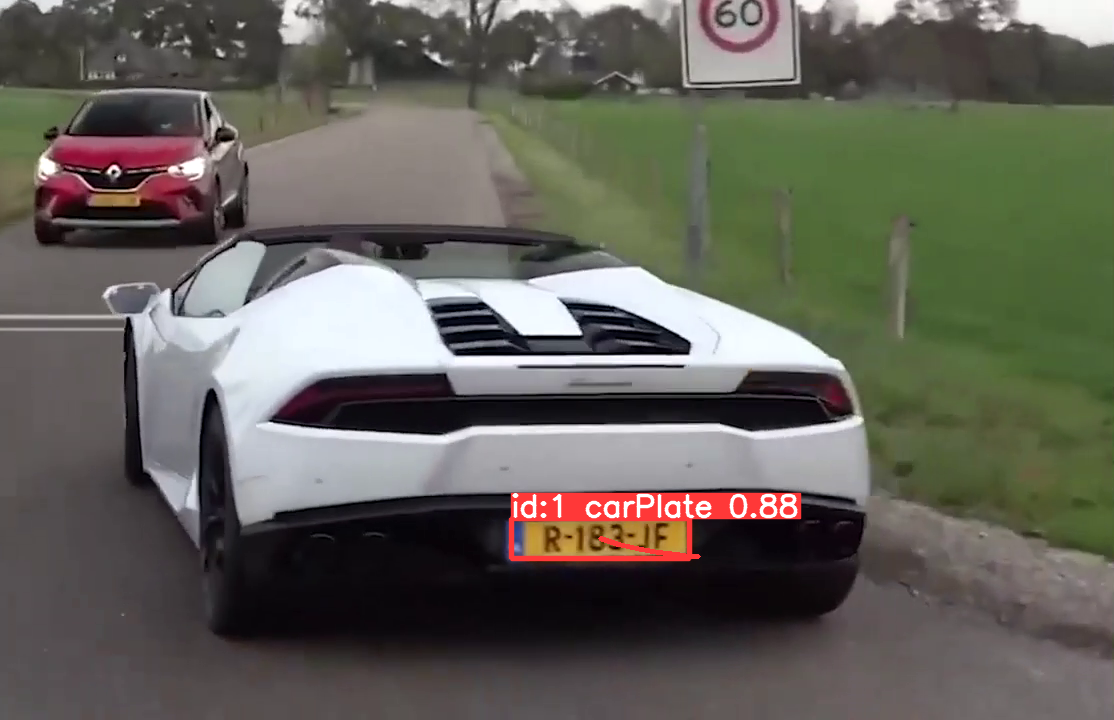


0: 416x640 1 carPlate, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


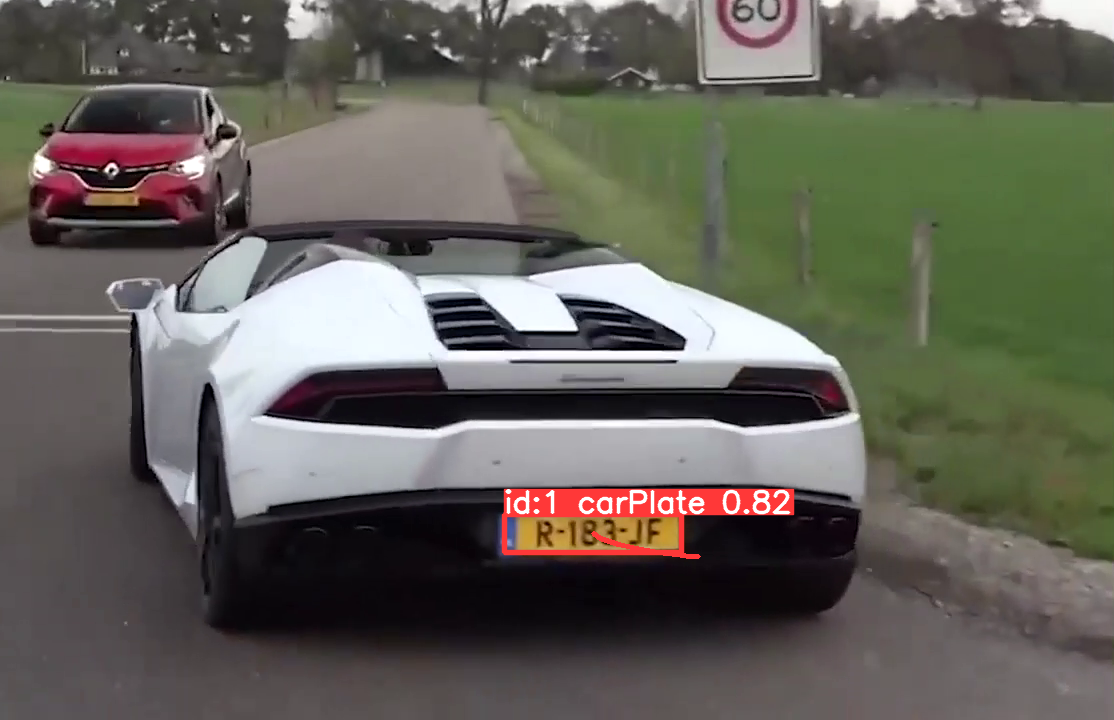


0: 416x640 1 carPlate, 9.7ms
Speed: 4.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


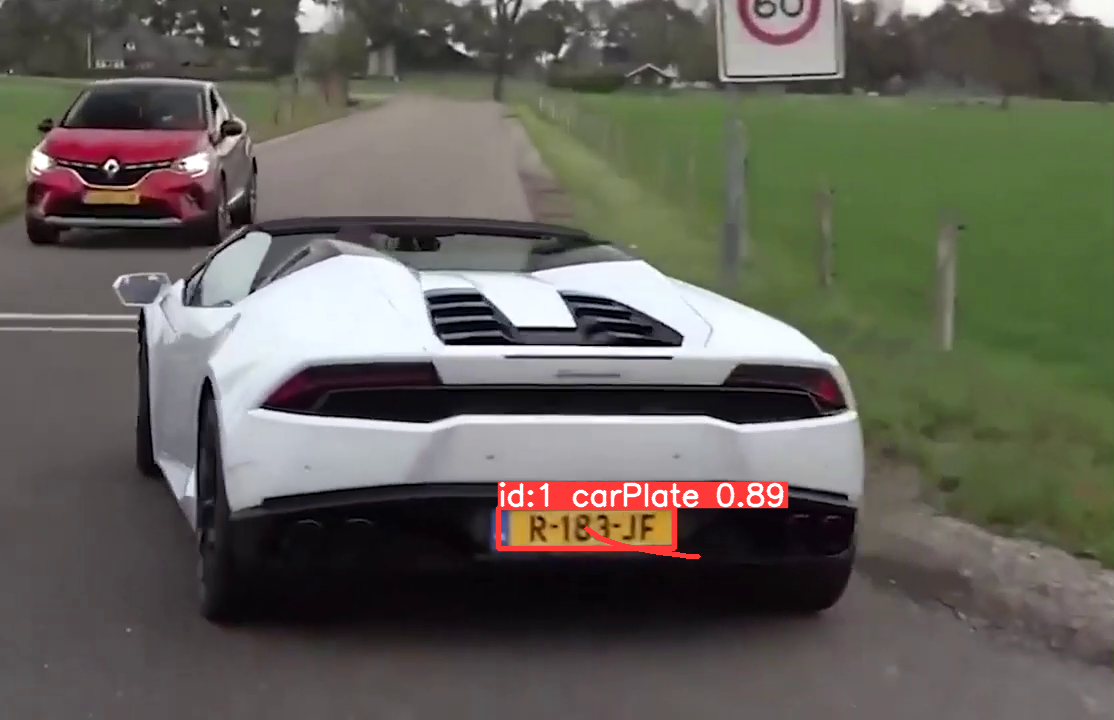


0: 416x640 1 carPlate, 10.5ms
Speed: 3.0ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


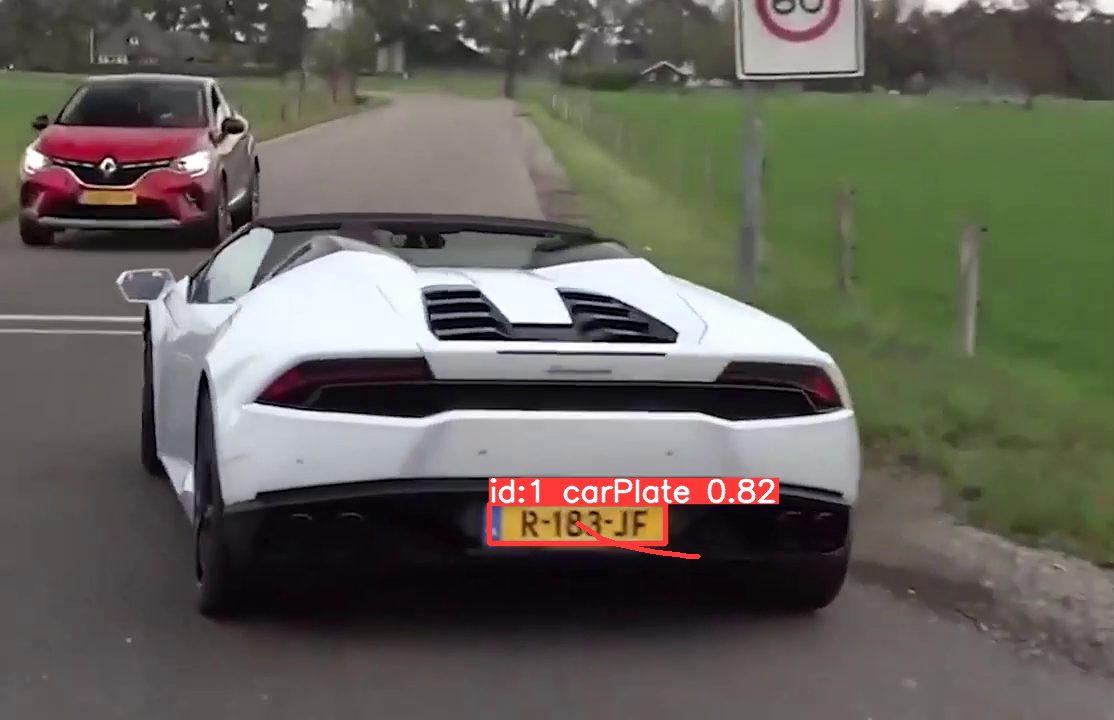


0: 416x640 1 carPlate, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


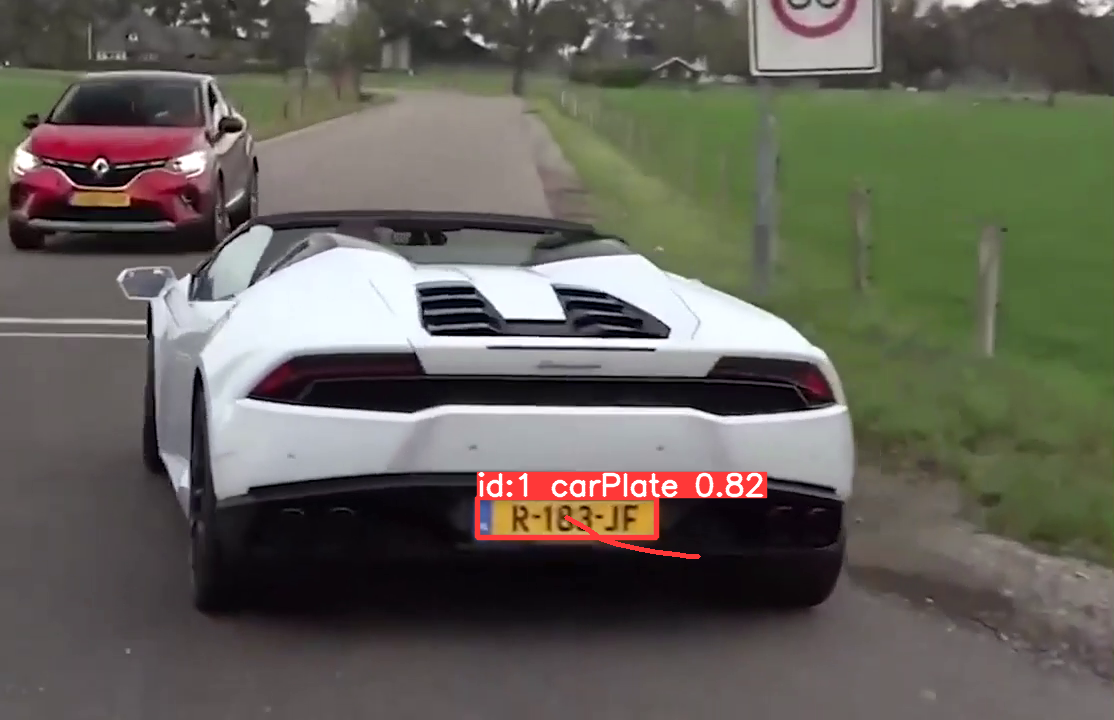

In [ ]:
#REFERENCE: https://docs.ultralytics.com/modes/track/#plotting-tracks-over-time
from collections import defaultdict
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

from ultralytics.utils.plotting import colors #REFERENCE: https://docs.ultralytics.com/reference/utils/plotting/

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/Modello/detect/train3/weights/best.pt')

# Open the video file
video_path = "/content/drive/MyDrive/Data/demo.mp4"
cap = cv2.VideoCapture(video_path)
frameRate = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Store the track history
track_history = defaultdict(lambda: [])

# open video file for writing
videoWriter = cv2.VideoWriter(
        'videoOut.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'),
        frameRate, (frame_width, frame_height))

if not videoWriter.isOpened():
    print(f"Error: Unable to open video file for writing {videoFileName}.")
    exit(-1)
i=0    
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        boxes = results[0].boxes.xywh.cpu()
        clss = results[0].boxes.cls.cpu().tolist()
        # Get the boxes and track IDs
        
        if results[0].boxes.id is not None: track_ids = results[0].boxes.id.int().cpu().tolist()
        #To avoid an error if no license plate is detected in some frame
        
        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Plot the tracks
        for box, track_id, cls in zip(boxes, track_ids, clss):
            x, y, w, h = box
            track = track_history[track_id]
            track.append((float(x), float(y)))  # x, y center point
            if len(track) > 30:  # retain 90 tracks for 90 frames
                track.pop(0)
                
            # Draw the tracking lines
            points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
            cv2.polylines(annotated_frame, [points], isClosed=False, color=colors(cls, True), thickness=3)

        # Display the annotated frame
        cv2_imshow(annotated_frame)
        videoWriter.write(annotated_frame)
    
        i += 1
        if i>10: break #just for testing the code
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
videoWriter.release()
